In [13]:
#import needed libraries
import math
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn.functional as nf
from sklearn.model_selection import train_test_split
torch.manual_seed(0)

In [35]:

class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Read data from CSV
data = pd.read_csv('rice_pca.csv')

# Separate features and target
X = data.drop(columns=['Class']).values
y = data['Class'].values.reshape(-1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 5000
performance = {'epoch': [], 'loss': [], 'accuracy': []}
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        with torch.no_grad():
            predicted = model(X_test_tensor)
            predicted = (predicted > 0.5).float()
            accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)

        performance['epoch'].append(epoch + 1)
        performance['loss'].append(loss.item())
        performance['accuracy'].append(accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}')



performance_df = pd.DataFrame()

performance_df['PCA Loss'] = performance['loss']
performance_df['PCA Accuracy'] = performance['accuracy']

Epoch [100/5000], Loss: 0.1738, Accuracy: 0.93
Epoch [200/5000], Loss: 0.1652, Accuracy: 0.92
Epoch [300/5000], Loss: 0.1530, Accuracy: 0.92
Epoch [400/5000], Loss: 0.1465, Accuracy: 0.91
Epoch [500/5000], Loss: 0.1398, Accuracy: 0.91
Epoch [600/5000], Loss: 0.1358, Accuracy: 0.90
Epoch [700/5000], Loss: 0.1537, Accuracy: 0.91
Epoch [800/5000], Loss: 0.1240, Accuracy: 0.91
Epoch [900/5000], Loss: 0.1202, Accuracy: 0.90
Epoch [1000/5000], Loss: 0.1176, Accuracy: 0.90
Epoch [1100/5000], Loss: 0.1141, Accuracy: 0.90
Epoch [1200/5000], Loss: 0.1284, Accuracy: 0.89
Epoch [1300/5000], Loss: 0.1106, Accuracy: 0.90
Epoch [1400/5000], Loss: 0.1079, Accuracy: 0.90
Epoch [1500/5000], Loss: 0.1051, Accuracy: 0.90
Epoch [1600/5000], Loss: 0.1043, Accuracy: 0.90
Epoch [1700/5000], Loss: 0.1240, Accuracy: 0.90
Epoch [1800/5000], Loss: 0.0977, Accuracy: 0.89
Epoch [1900/5000], Loss: 0.1462, Accuracy: 0.89
Epoch [2000/5000], Loss: 0.0944, Accuracy: 0.90
Epoch [2100/5000], Loss: 0.0913, Accuracy: 0.90
E

In [38]:
# Read data from CSV
data = pd.read_csv('rice_mds.csv')

# Separate features and target
X = data.drop(columns=['Class']).values
y = data['Class'].values.reshape(-1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 5000
performance = {'epoch': [], 'loss': [], 'accuracy': []}
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        with torch.no_grad():
            predicted = model(X_test_tensor)
            predicted = (predicted > 0.5).float()
            accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)

        performance['epoch'].append(epoch + 1)
        performance['loss'].append(loss.item())
        performance['accuracy'].append(accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}')



performance_df['MDS Loss'] = performance['loss']
performance_df['MDS Accuracy'] = performance['accuracy']
performance_df.index = performance['epoch']

Epoch [100/5000], Loss: 0.1718, Accuracy: 0.92
Epoch [200/5000], Loss: 0.1661, Accuracy: 0.92
Epoch [300/5000], Loss: 0.1541, Accuracy: 0.92
Epoch [400/5000], Loss: 0.1434, Accuracy: 0.92
Epoch [500/5000], Loss: 0.1355, Accuracy: 0.92
Epoch [600/5000], Loss: 0.1309, Accuracy: 0.92
Epoch [700/5000], Loss: 0.1259, Accuracy: 0.91
Epoch [800/5000], Loss: 0.1245, Accuracy: 0.91
Epoch [900/5000], Loss: 0.1173, Accuracy: 0.92
Epoch [1000/5000], Loss: 0.1157, Accuracy: 0.92
Epoch [1100/5000], Loss: 0.1121, Accuracy: 0.91
Epoch [1200/5000], Loss: 0.1101, Accuracy: 0.92
Epoch [1300/5000], Loss: 0.1053, Accuracy: 0.91
Epoch [1400/5000], Loss: 0.1033, Accuracy: 0.91
Epoch [1500/5000], Loss: 0.1117, Accuracy: 0.91
Epoch [1600/5000], Loss: 0.0956, Accuracy: 0.91
Epoch [1700/5000], Loss: 0.0994, Accuracy: 0.91
Epoch [1800/5000], Loss: 0.0941, Accuracy: 0.91
Epoch [1900/5000], Loss: 0.0896, Accuracy: 0.91
Epoch [2000/5000], Loss: 0.0916, Accuracy: 0.91
Epoch [2100/5000], Loss: 0.0854, Accuracy: 0.90
E

In [36]:
# Read data from CSV
data = pd.read_csv('rice.csv')

# Separate features and target
X = data.drop(columns=['Class']).values
y = data['Class'].values.reshape(-1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 5000
performance = {'epoch': [], 'loss': [], 'accuracy': []}
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        with torch.no_grad():
            predicted = model(X_test_tensor)
            predicted = (predicted > 0.5).float()
            accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)

        performance['epoch'].append(epoch + 1)
        performance['loss'].append(loss.item())
        performance['accuracy'].append(accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}')


# Read data from CSV
data = pd.read_csv('rice.csv')

# Separate features and target
X = data.drop(columns=['Class']).values
y = data['Class'].values.reshape(-1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 5000
performance = {'epoch': [], 'loss': [], 'accuracy': []}
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        with torch.no_grad():
            predicted = model(X_test_tensor)
            predicted = (predicted > 0.5).float()
            accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)

        performance['epoch'].append(epoch + 1)
        performance['loss'].append(loss.item())
        performance['accuracy'].append(accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}')




performance_df['Baseline Accuracy'] = performance['accuracy']_df['Baseline Accuracy'] = performance['accuracy']

Epoch [100/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [200/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [300/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [400/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [500/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [600/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [700/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [800/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [900/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [1000/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [1100/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [1200/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [1300/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [1400/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [1500/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [1600/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [1700/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [1800/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [1900/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [2000/5000], Loss: 58.0052, Accuracy: 0.46
Epoch [2100/5000], Loss: 58.0

([<matplotlib.axis.YTick at 0x726396ff3110>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.3, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

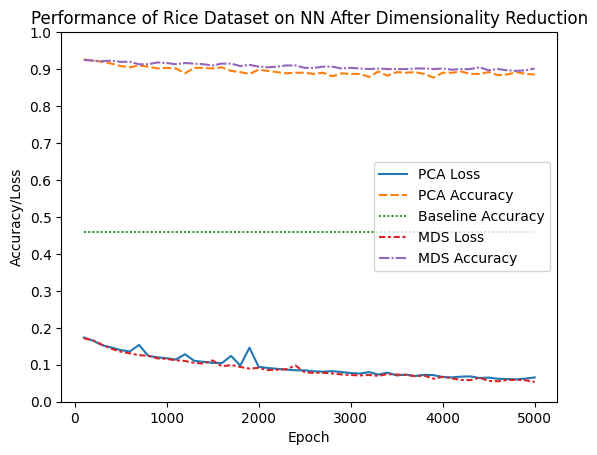

In [39]:
sns.lineplot(performance_df)
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.title('Performance of Rice Dataset on NN After Dimensionality Reduction')
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

In [47]:
# Read data from CSV
data = pd.read_csv('mds_em.csv')

# Separate features and target
X = data.drop(columns=['Class']).values
y = data['Class'].values.reshape(-1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 5000
performance = {'epoch': [], 'loss': [], 'accuracy': []}
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        with torch.no_grad():
            predicted = model(X_test_tensor)
            predicted = (predicted > 0.5).float()
            accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)

        performance['epoch'].append(epoch + 1)
        performance['loss'].append(loss.item())
        performance['accuracy'].append(accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}')





performance_df = pd.DataFrame()
performance_df['EM MDS Accuracy'] = performance['accuracy']
performance_df.index = performance['epoch']

Epoch [100/5000], Loss: 41.3143, Accuracy: 0.58
Epoch [200/5000], Loss: 43.0113, Accuracy: 0.57
Epoch [300/5000], Loss: 43.0027, Accuracy: 0.57
Epoch [400/5000], Loss: 42.9981, Accuracy: 0.57
Epoch [500/5000], Loss: 42.9947, Accuracy: 0.57
Epoch [600/5000], Loss: 42.9918, Accuracy: 0.57
Epoch [700/5000], Loss: 42.9891, Accuracy: 0.57
Epoch [800/5000], Loss: 42.9865, Accuracy: 0.57
Epoch [900/5000], Loss: 42.9837, Accuracy: 0.57
Epoch [1000/5000], Loss: 54.0533, Accuracy: 0.50
Epoch [1100/5000], Loss: 54.6385, Accuracy: 0.44
Epoch [1200/5000], Loss: 56.1116, Accuracy: 0.43
Epoch [1300/5000], Loss: 56.1116, Accuracy: 0.43
Epoch [1400/5000], Loss: 56.1116, Accuracy: 0.43
Epoch [1500/5000], Loss: 56.1116, Accuracy: 0.43
Epoch [1600/5000], Loss: 56.1116, Accuracy: 0.43
Epoch [1700/5000], Loss: 56.1116, Accuracy: 0.43
Epoch [1800/5000], Loss: 56.1116, Accuracy: 0.43
Epoch [1900/5000], Loss: 56.1116, Accuracy: 0.43
Epoch [2000/5000], Loss: 56.1116, Accuracy: 0.43
Epoch [2100/5000], Loss: 56.1

In [48]:
# Read data from CSV
data = pd.read_csv('mds_sc.csv')

# Separate features and target
X = data.drop(columns=['Class']).values
y = data['Class'].values.reshape(-1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 5000
performance = {'epoch': [], 'loss': [], 'accuracy': []}
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        with torch.no_grad():
            predicted = model(X_test_tensor)
            predicted = (predicted > 0.5).float()
            accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)

        performance['epoch'].append(epoch + 1)
        performance['loss'].append(loss.item())
        performance['accuracy'].append(accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}')






performance_df['SC MDS Accuracy'] = performance['accuracy']
performance_df.index = performance['epoch']

Epoch [100/5000], Loss: 55.9407, Accuracy: 0.43
Epoch [200/5000], Loss: 55.8691, Accuracy: 0.43
Epoch [300/5000], Loss: 55.7554, Accuracy: 0.43
Epoch [400/5000], Loss: 42.0348, Accuracy: 0.57
Epoch [500/5000], Loss: 56.0733, Accuracy: 0.43
Epoch [600/5000], Loss: 43.0742, Accuracy: 0.57
Epoch [700/5000], Loss: 42.8912, Accuracy: 0.57
Epoch [800/5000], Loss: 41.8237, Accuracy: 0.59
Epoch [900/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [1000/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [1100/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [1200/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [1300/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [1400/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [1500/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [1600/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [1700/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [1800/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [1900/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [2000/5000], Loss: 56.1936, Accuracy: 0.43
Epoch [2100/5000], Loss: 56.1

([<matplotlib.axis.YTick at 0x726395d6af10>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.3, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

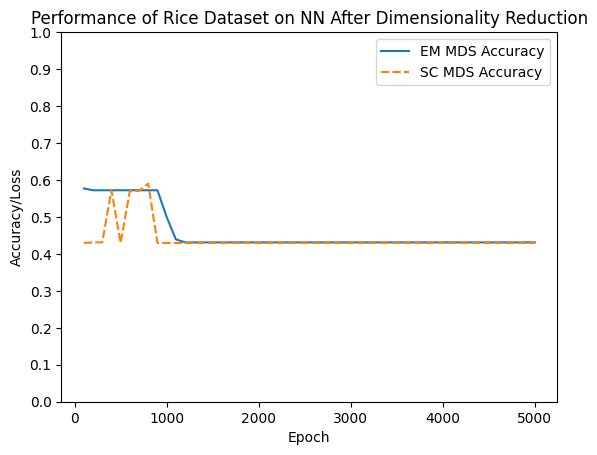

In [49]:
sns.lineplot(performance_df)
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.title('Performance of Rice Dataset on NN After Dimensionality Reduction')
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])